# Single Parent Population
## Fourth Try
### 99/09/04

Looking for critical exponent

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random

### Poisson distribution for number of childeren
The distrbution is discrete. It has been used for this purpose and its only parameter $\lambda$ makes sense!

In [3]:
#Poisson distribution assumption

def poisson_next_gen(n, lam):
    n_next  = 0
    inf_num = 0

    for i in range(n):
        inf_num = int(np.random.poisson(lam, 1))
        n_next += inf_num
        #need to assume logic range
#         if inf_num < 10:
#             n_next +=inf_num
    return n_next

### Standard deviation of the population

Wall time: 9.51 s


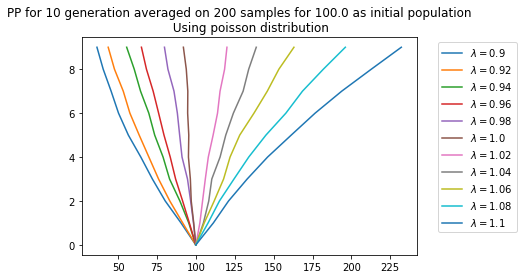

In [4]:
%%time

lam_mat = np.arange(0.9, 1.1, 0.02)

 

for lam in lam_mat:
    generation   = 10
    time    = np.arange(generation)
    pop     = np.zeros(generation)
    pop[0]  = 100
    pop_std = np.zeros(generation)

    ave = 200
    ns = np.zeros(ave)


    for t in range((generation-1)):
        for i in range(ave):
            ns[i] = poisson_next_gen(int(pop[t]), lam)
        pop[t+1]     = np.mean(ns)
        pop_std[t+1] = np.std(ns) 

    plt.plot(pop, time, label = '$\lambda = ${}'.format(np.round(lam, 3)))
    plt.title("PP for {} generation averaged on {} samples for {} as initial population \
    \n Using poisson distribution".format(generation, ave, pop[0]))
    
#     plt.plot(pop_std, time, label = f'std for $\lambda$ = {lam}')
    
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

Wall time: 9.51 s


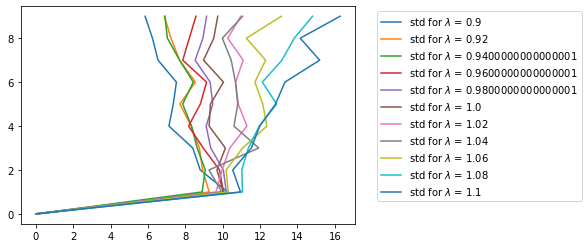

In [5]:
%%time

lam_mat = np.arange(0.9, 1.1, 0.02)

 

for lam in lam_mat:
    generation   = 10
    time    = np.arange(generation)
    pop     = np.zeros(generation)
    pop[0]  = 100
    pop_std = np.zeros(generation)

    ave = 200
    ns = np.zeros(ave)


    for t in range((generation-1)):
        for i in range(ave):
            ns[i] = poisson_next_gen(int(pop[t]), lam)
        pop[t+1]     = np.mean(ns)
        pop_std[t+1] = np.std(ns) 

#     plt.plot(pop, time, label = '$\lambda = ${}'.format(np.round(lam, 3)))
#     plt.title("PP for {} generation averaged on {} samples for {} as initial population \
#     \n Using poisson distribution".format(generation, ave, pop[0]))
    
    plt.plot(pop_std, time, label = f'std for $\lambda$ = {lam}')
    
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

Wall time: 9.28 s


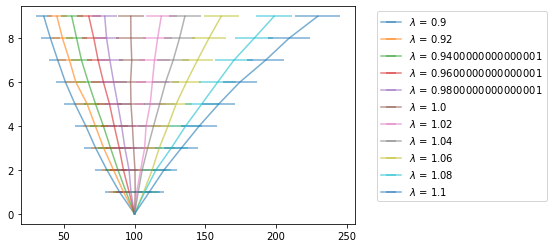

In [10]:
%%time

lam_mat = np.arange(0.9, 1.1, 0.02)

 

for lam in lam_mat:
    generation   = 10
    time    = np.arange(generation)
    pop     = np.zeros(generation)
    pop[0]  = 100
    pop_std = np.zeros(generation)

    ave = 200
    ns = np.zeros(ave)


    for t in range((generation-1)):
        for i in range(ave):
            ns[i] = poisson_next_gen(int(pop[t]), lam)
        pop[t+1]     = np.mean(ns)
        pop_std[t+1] = np.std(ns) 

#     plt.plot(pop, time, label = '$\lambda = ${}'.format(np.round(lam, 3)))
#     plt.title("PP for {} generation averaged on {} samples for {} as initial population \
#     \n Using poisson distribution".format(generation, ave, pop[0]))
    
    plt.errorbar(pop, time, yerr = None, xerr = pop_std, alpha = 0.6 , label = f'$\lambda$ = {lam}')
    
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

### Critical value of $\lambda$ average of children number

In [11]:
#does it extinc?

def extinc(pop_0, lam):
    pop  = []
    time = []
    pop.append(pop_0)
    
    i = 0
    while 1:
        pop.append(poisson_next_gen(pop[i], lam))
        i += 1
        
        if pop[i] < 0.5 * pop[0]:
            return 1
        if pop[i] > 1.5 * pop[0]:
            return 0

In [12]:
#probability of extinction

def ext_prob(pop_0, lam):
    samples = 500
    extinctions = 0
    for s in range(samples):
        extinctions += extinc(pop_0, lam)

    extinction_probability = extinctions / samples

    return extinction_probability

Wall time: 2min 15s


Text(0.5, 0, '$\\lambda$')

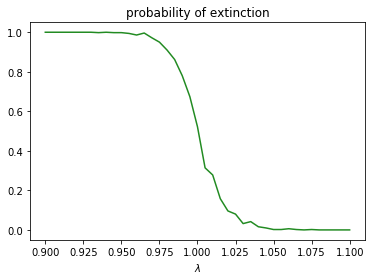

In [13]:
%%time

lam_mat     = np.arange(0.9, 1.1, 0.005)
probability = np.zeros(np.size(lam_mat)) 

pop_0 = 100

for i in range(np.size(lam_mat)):
    probability[i] = ext_prob(pop_0, lam_mat[i])
    
    
plt.plot(lam_mat, probability, c = 'forestgreen')
plt.title("probability of extinction")
plt.xlabel("$\lambda$")


Text(0.5, 0, '$\\lambda$')

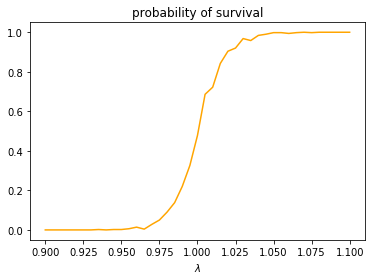

In [14]:
plt.plot(lam_mat, (1 - probability), c = 'orange')
plt.title("probability of survival")
plt.xlabel("$\lambda$")


In [15]:
print(probability, lam_mat, np.size(lam_mat))

[1.    1.    1.    1.    1.    1.    1.    0.998 1.    0.998 0.998 0.994
 0.986 0.996 0.972 0.95  0.91  0.862 0.78  0.674 0.522 0.314 0.278 0.158
 0.096 0.08  0.032 0.042 0.016 0.01  0.002 0.002 0.006 0.002 0.    0.002
 0.    0.    0.    0.    0.   ] [0.9   0.905 0.91  0.915 0.92  0.925 0.93  0.935 0.94  0.945 0.95  0.955
 0.96  0.965 0.97  0.975 0.98  0.985 0.99  0.995 1.    1.005 1.01  1.015
 1.02  1.025 1.03  1.035 1.04  1.045 1.05  1.055 1.06  1.065 1.07  1.075
 1.08  1.085 1.09  1.095 1.1  ] 41


In [16]:
fit = np.polyfit(np.log(lam_mat[20:31] - 0.975), np.log(probability[20:31]), 1)
fit

array([ -4.38554695, -16.2318259 ])

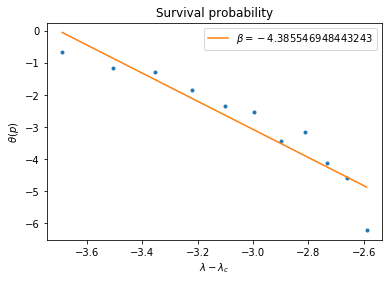

In [17]:
plt.plot(np.log(lam_mat[20:31] - 0.975), np.log(probability[20:31]), '.')
plt.plot(np.log(lam_mat[20:31] - 0.975), fit[0] * np.log(lam_mat[20:31] - 0.975) + fit[1], label = f'$\u03B2={fit[0]}$')

plt.title("Survival probability")
plt.ylabel("$\u03B8 (p)$")
plt.xlabel("$\lambda - \lambda_c$")

plt.legend()

### Mean size
It's 0 for $\lambda$s which extinct and is $\infty$ for which don't for sure, but how should we calculate it in critical range?!

### $P_k(\lambda)$ 
One can ask for the probability $P_k(\lambda)$ that the number of descendants is at least k.

KeyboardInterrupt: 

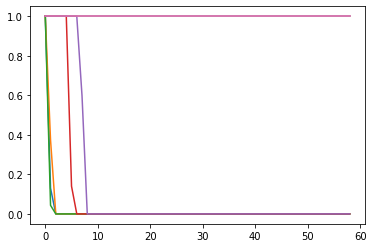

In [54]:
%%time


generation = 60
samples    = 300



lam_mat = np.arange(0.5, 1.3, 0.1)


for lam in lam_mat:
    p_k = []
    pop_0 = 20
    next_pop = 0
    for k in range(1, generation):
        survival = 0
        for s in range(samples):
            next_pop = poisson_next_gen(pop_0, lam)
            if next_pop != 0:
                survival += 1
            else:
                break

        p_k.append(survival / samples)
        pop_0 = next_pop

    plt.plot(p_k, label = f'$\lambda$ = {lam}')
    
plt.title("Probability that the number of descendants is at least k")
plt.ylabel("$P_k(\lambda)$")
plt.xlabel("k")

plt.legend()

Wall time: 19.1 s


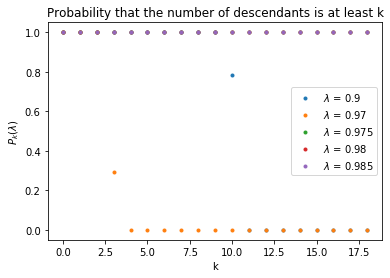

In [70]:
%%time


generation = 20
samples    = 1000



lam_mat = [0.9, 0.970, 0.975, 0.980, 0.985] #np.arange(1, 1.1, 0.1)


for lam in lam_mat:
    p_k = []
    pop_0 = 20
    next_pop = 0
    for k in range(1, generation):
        survival = 0
        for s in range(samples):
            next_pop = poisson_next_gen(pop_0, lam)
            if next_pop != 0:
                survival += 1
            else:
                break

        p_k.append(survival / samples)
        pop_0 = next_pop

    plt.plot(p_k,'.', label = f'$\lambda$ = {lam}')
    
plt.title("Probability that the number of descendants is at least k")
plt.ylabel("$P_k(\lambda)$")
plt.xlabel("k")

plt.legend()